#Question 4: Data Visualization (10 points)

##Part A)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Function to read the dataset and preprocess
def read_and_preprocess(file_path):
    weather_data = pd.read_csv(file_path)
    weather_data['time'] = pd.to_datetime(weather_data['time'])
    weather_data.set_index('time', inplace=True)
    weather_data['Ftemp'] = (weather_data['Ktemp'] - 273.15) * 9/5 + 32
    return weather_data

# Function to plot the graph
def plot_graph(year, weather_data):
    plt.close('all')  # Close previous plots to prevent memory leak
    fig, ax = plt.subplots(figsize=(10, 5))
    year_data = weather_data[weather_data.index.year == year]
    monthly_avg_temp = year_data.groupby(year_data.index.month)['Ftemp'].mean()
    ax.scatter(monthly_avg_temp.index, monthly_avg_temp.values)  # Changed to scatter plot here
    ax.set_title(f'Average Monthly Temperature in {year}')
    ax.set_xlabel('Month')
    ax.set_xticks(range(1, 13))  # Set x-ticks to show all months
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    ax.set_ylabel('Average Temperature (°F)')
    ax.grid(True)
    plt.show()

# Assuming 'weather.csv' is your file path
file_path = 'weather.csv'  # replace with the path to your CSV file
weather_data = read_and_preprocess(file_path)

# Assuming the data contains the following years (replace with actual years from the dataset)
years = weather_data.index.year.unique()
year_slider = widgets.IntSlider(min=min(years), max=max(years), step=1, description='Select Year:', value=min(years))

# Create an interactive widget for the slider
widgets.interactive(lambda year: plot_graph(year, weather_data), year=year_slider)

interactive(children=(IntSlider(value=1950, description='Select Year:', max=2021, min=1950), Output()), _dom_c…

Above is the plot of the average temperature (in Fahrenheit) using a scatter plot. The interactive visualization can be accessed here:



##Part B)

In [ ]:
import pandas as pd

# Function to read the dataset, preprocess, and calculate yearly average temperature
def read_and_preprocess(file_path):
    weather_data = pd.read_csv(file_path)
    weather_data['time'] = pd.to_datetime(weather_data['time'])
    weather_data.set_index('time', inplace=True)
    weather_data['Ftemp'] = (weather_data['Ktemp'] - 273.15) * 9/5 + 32

    # Calculate yearly average temperature
    yearly_avg_temp = weather_data.resample('Y')['Ftemp'].mean()
    return yearly_avg_temp

# Function to find the first year with average temperature > 55°F
def find_year_exceeds_55(yearly_avg_temp):
    exceed_55 = yearly_avg_temp[yearly_avg_temp > 55]
    if not exceed_55.empty:
        return exceed_55.index[0].year
    else:
        return None

# Assuming 'weather.csv' is your file path
file_path = 'weather.csv'  # Replace with the path to your CSV file
yearly_avg_temp = read_and_preprocess(file_path)
first_year_exceeds_55 = find_year_exceeds_55(yearly_avg_temp)

print(f"The first year where the average temperature exceeds 55 degrees Fahrenheit: {first_year_exceeds_55}")

The first year where the average temperature exceeds 55 degrees Fahrenheit: 1953


The first year where the average temperature exceeds 55 degrees Fahrenheit is 1953.

##Part C)


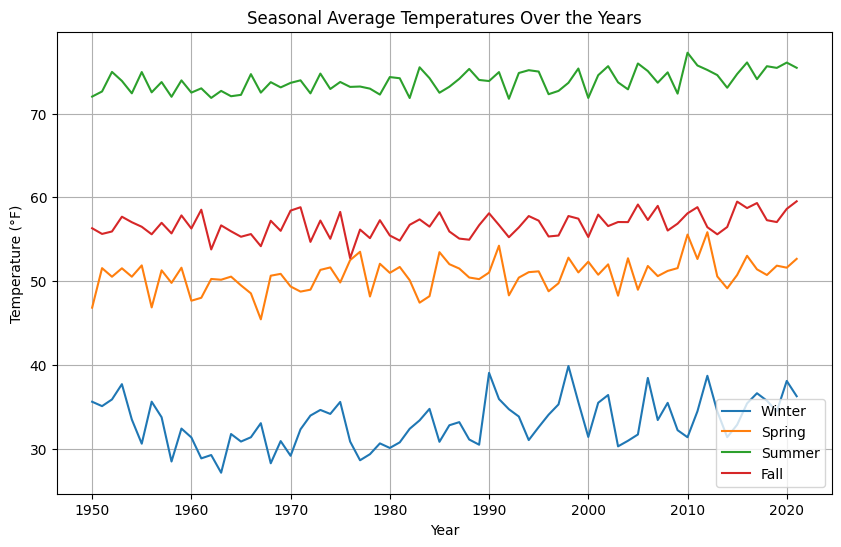

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

# Load the weather data
df = pd.read_csv('weather.csv')

# Convert the temperatures from Kelvin to Fahrenheit
df['Ftemp'] = (df['Ktemp'] - 273.15) * (9/5) + 32

# Convert the 'time' column to datetime and extract year and month
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

# Define the seasons in a dictionary
seasons = {
    'winter': (12, 1, 2),
    'spring': (3, 4, 5),
    'summer': (6, 7, 8),
    'fall': (9, 10, 11)
}

# Function to determine the season for a given month
def get_season(month):
    for season, months in seasons.items():
        if month in months:
            return season
    return 'Unknown'

# Apply the season function to each row in the dataframe
df['season'] = df['month'].apply(get_season)

# Group by year and season and calculate the average temperature
seasonal_avg_temp = df.groupby(['year', 'season'])['Ftemp'].mean().reset_index()

# Pivot the data to have seasons as columns and years as rows
seasonal_avg_temp_pivot = seasonal_avg_temp.pivot(index='year', columns='season', values='Ftemp')

# Reorder the columns to have seasons in the correct order
seasonal_avg_temp_pivot = seasonal_avg_temp_pivot[['winter', 'spring', 'summer', 'fall']]

# Plotting
plt.figure(figsize=(10, 6))

# Plot each season's average temperature
for season in ['winter', 'spring', 'summer', 'fall']:
    plt.plot(seasonal_avg_temp_pivot.index, seasonal_avg_temp_pivot[season], label=season.capitalize())

plt.title('Seasonal Average Temperatures Over the Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.grid(True)
plt.show()

Above is the transition of the seasonal average temperatures over the years. We can see that there is an upward trend in temperatures for all seasons, suggesting a general increase in temperatures over the years.